## To predict whether a person will have diabetes or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Load the data
data=pd.read_csv('diabetes1.csv')#https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Basic checkes

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data.describe()  ## discribe statistic values ## mean >median  #SD

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Exploratory  data Analysis

In [8]:
## step 1-univaried analysis
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Pregnancies', ylabel='count'>

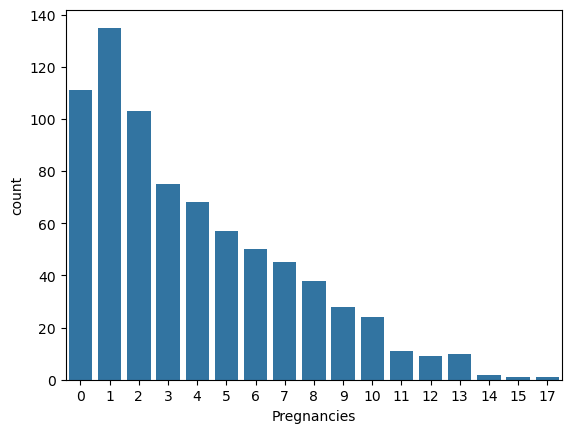

In [9]:
sns.countplot(x="Pregnancies",data=data)
### Maximum patients have conceived  1 and 0 times.

In [10]:
data.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

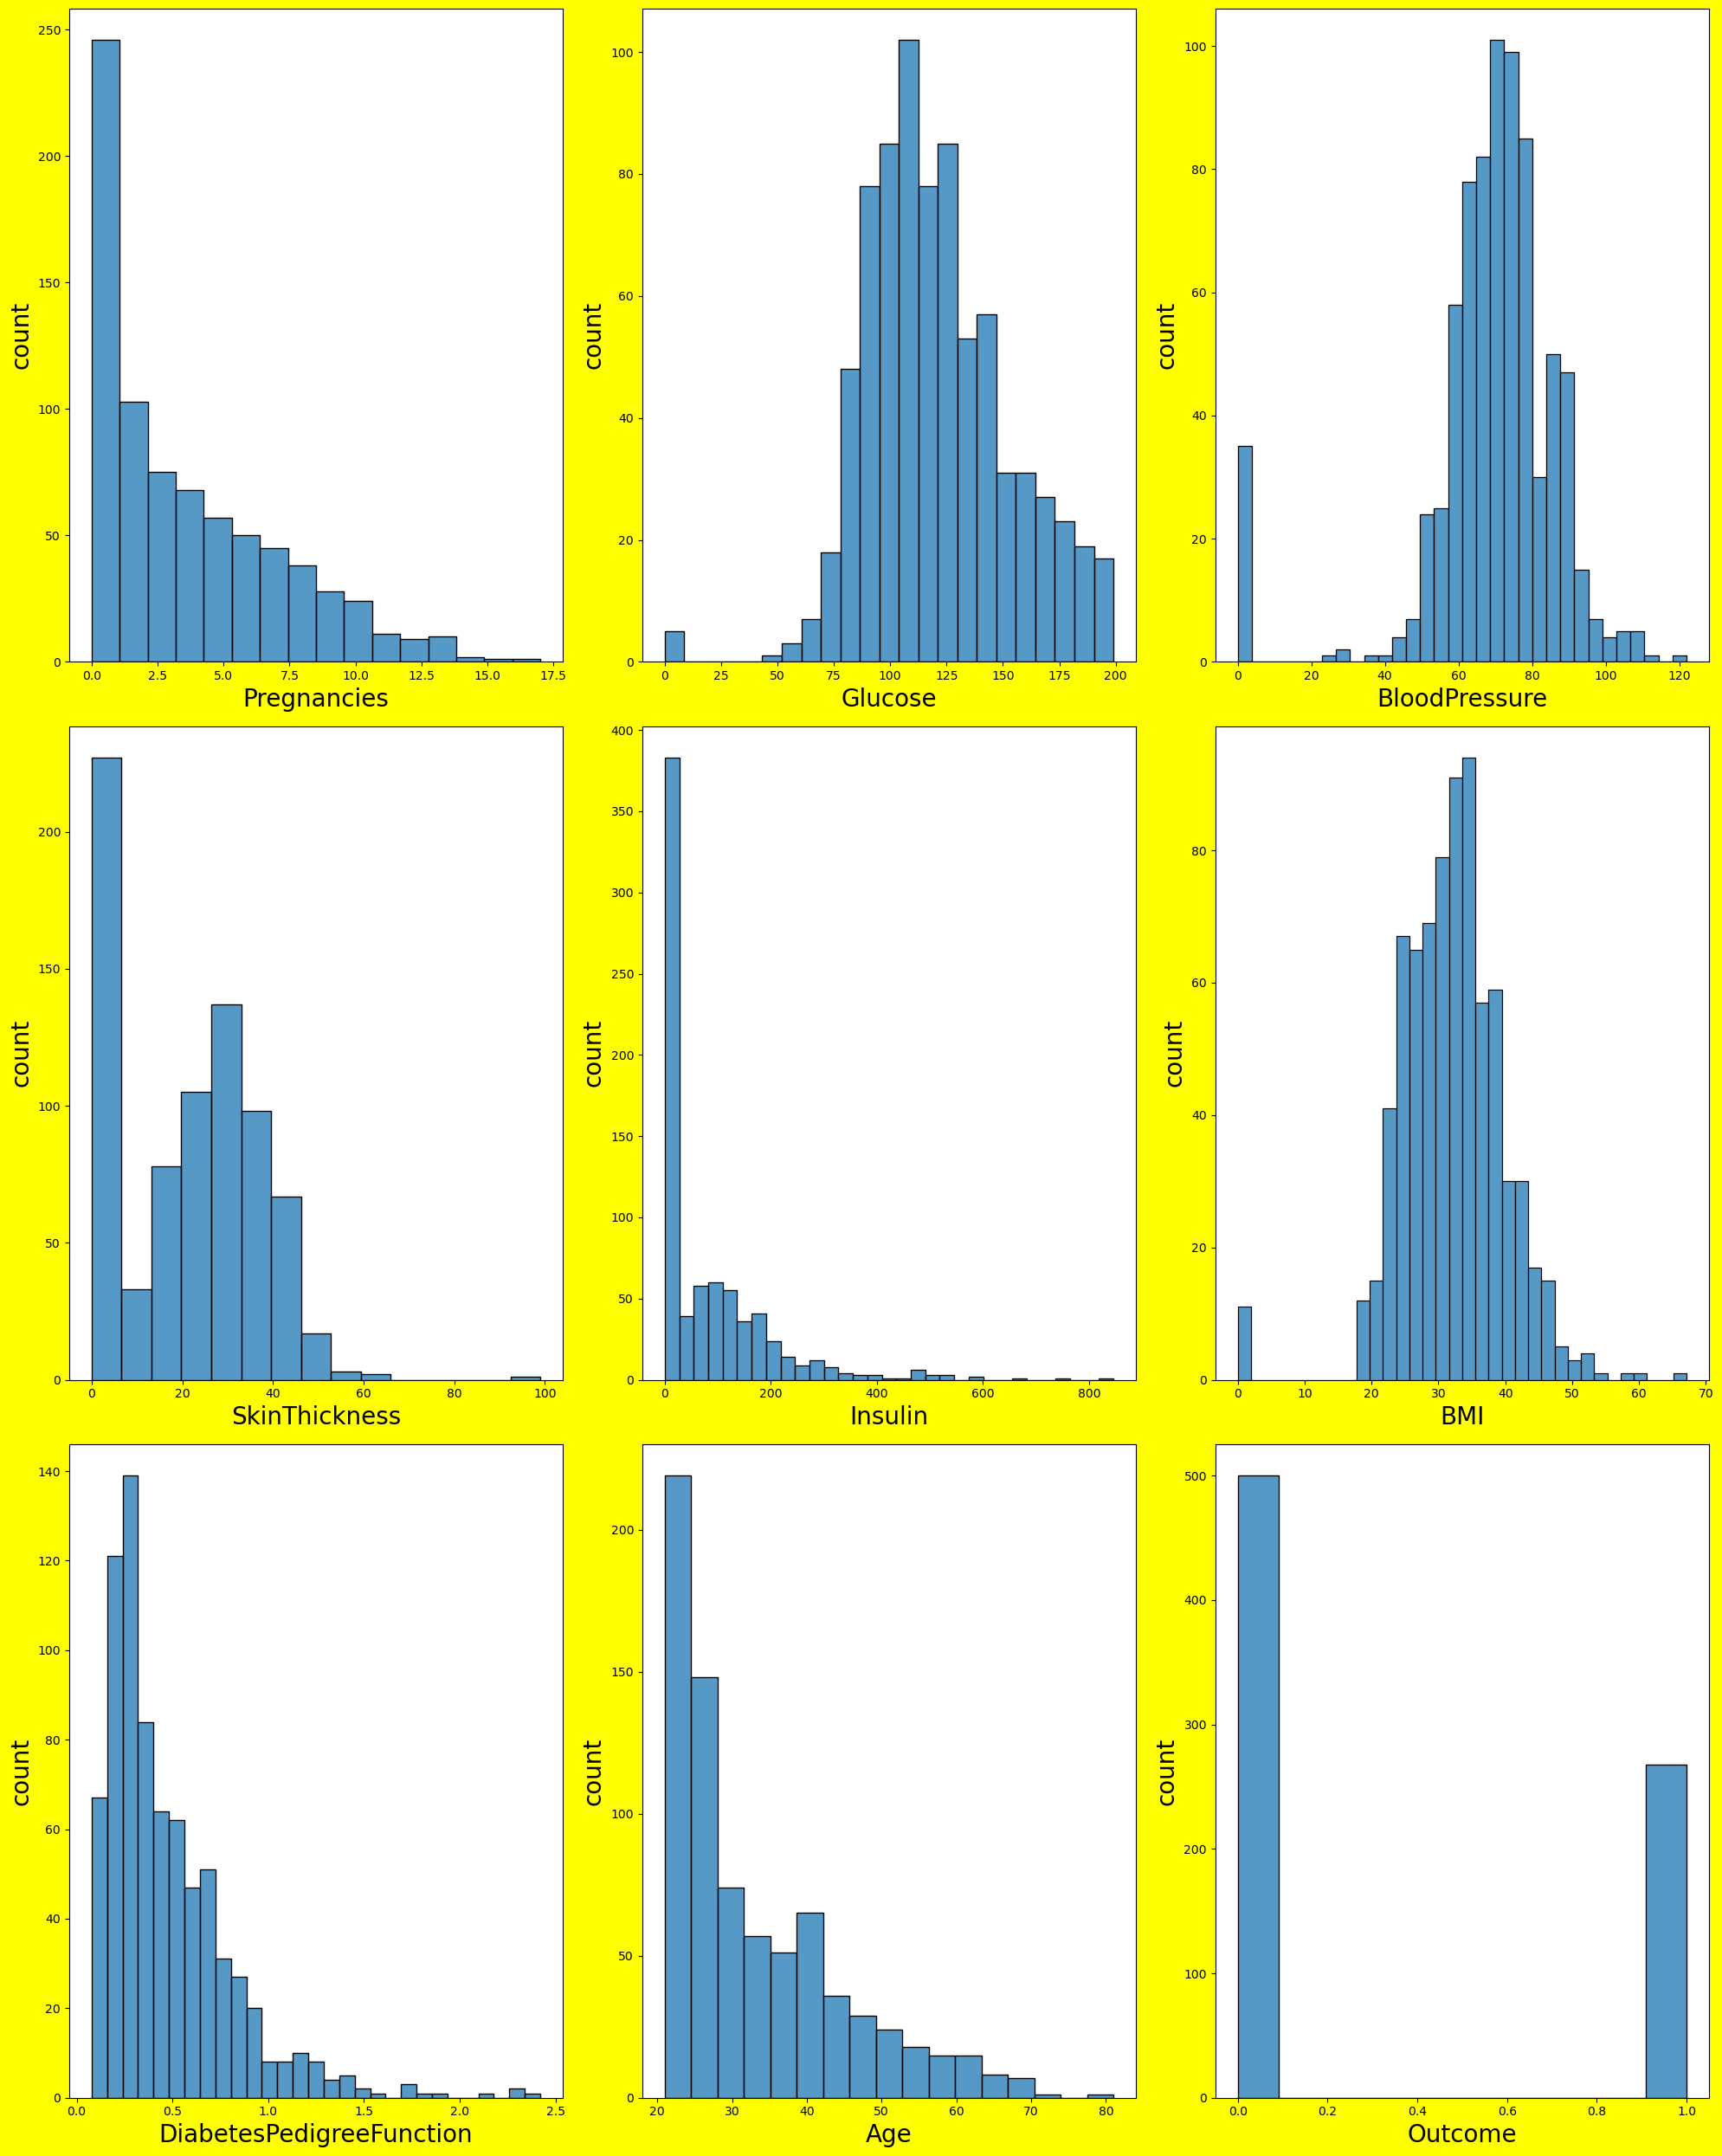

In [11]:
plt.figure(figsize=(20,25),facecolor="yellow")

plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [12]:
for column in data:
    print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


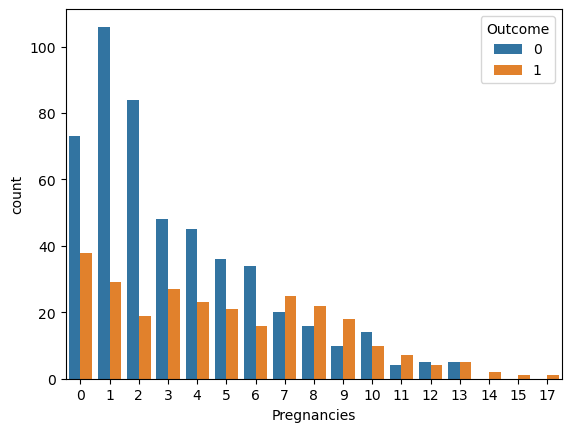

In [13]:
##Bivariate Analysis refers to plots between input variables and target variable.

## Analyzing how preganancies impact the patient with diabetes.
sns.countplot(x='Pregnancies',hue='Outcome',data=data)
plt.show()

<Axes: xlabel='Glucose', ylabel='Count'>

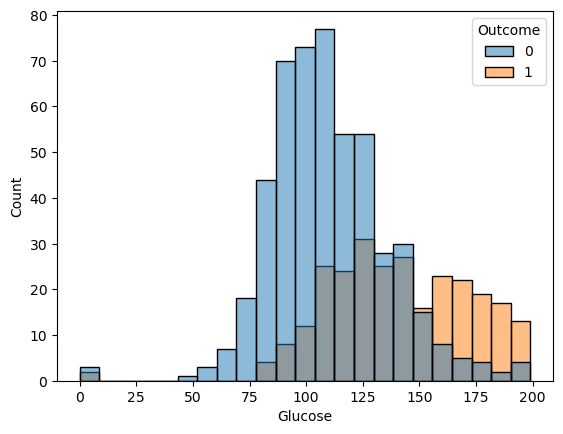

In [14]:
## Aanlyzing the relationship between diabetes and Glucose
sns.histplot(x="Glucose",hue="Outcome",data=data)

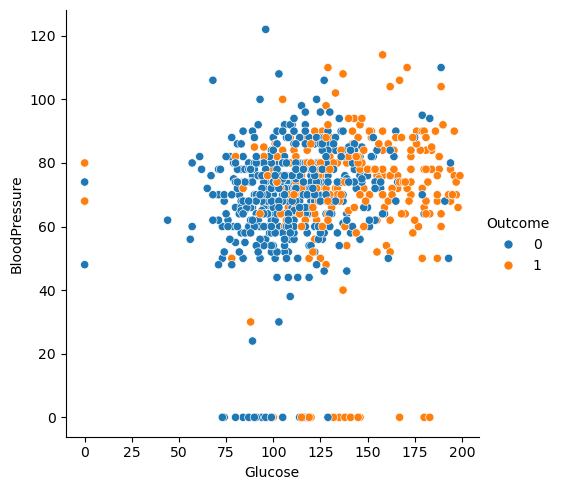

In [15]:
## Analyze Glucose with blood pressure
sns.relplot(x="Glucose",y="BloodPressure",hue="Outcome",data=data)
plt.show()

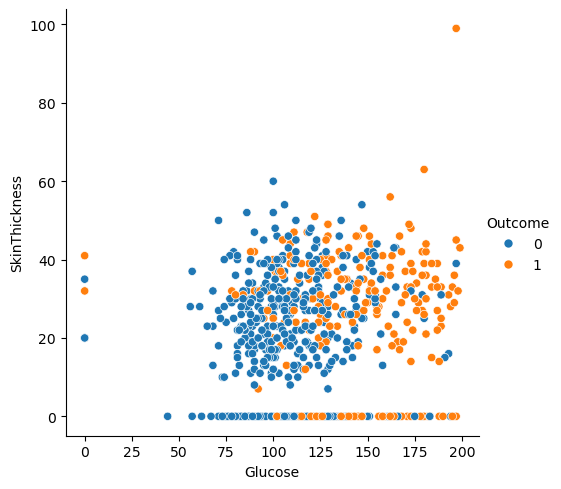

In [16]:
## Analyze Glucose with SkinThickness

sns.relplot(x="Glucose",y="SkinThickness",hue="Outcome",data=data)
plt.show()

<Axes: xlabel='BloodPressure', ylabel='Count'>

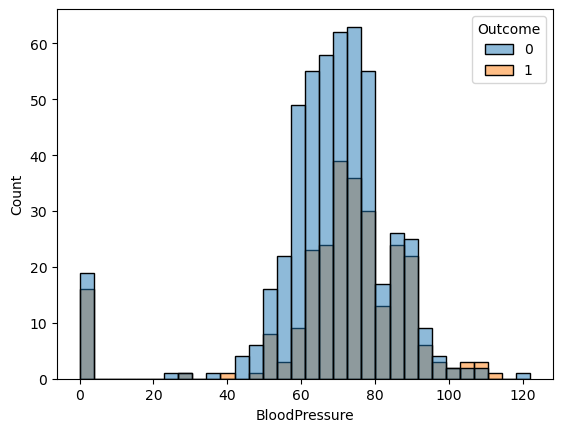

In [17]:
## Analyze relationship between BloodPressure and Outcome
sns.histplot(x="BloodPressure",hue="Outcome",data=data)

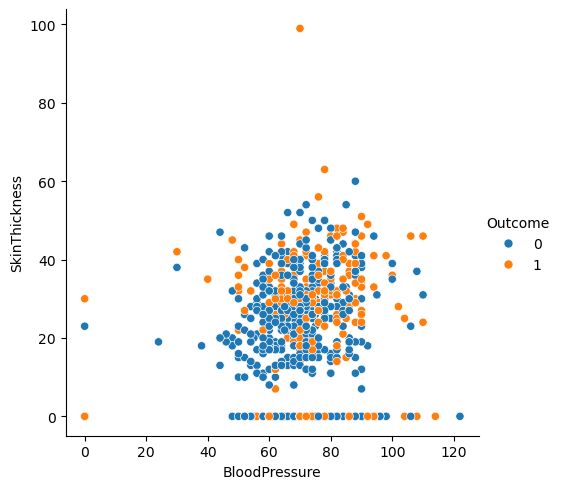

In [18]:
## Analyze BP with SkinThickness
sns.relplot(x="BloodPressure",y="SkinThickness",hue="Outcome",data=data)
plt.show()

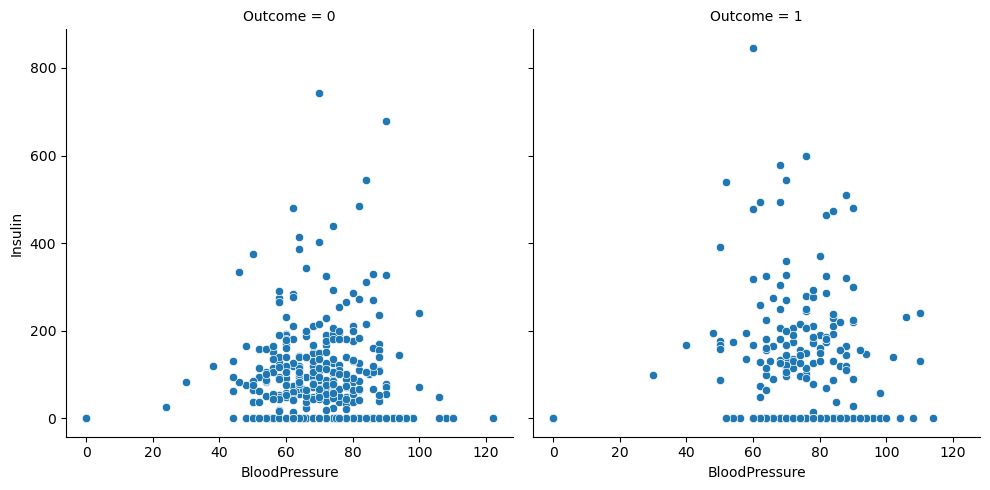

In [19]:
## Analyze BP with Insulin
sns.relplot(x="BloodPressure",y="Insulin",col="Outcome",data=data)
plt.show()

<Axes: xlabel='Insulin', ylabel='Count'>

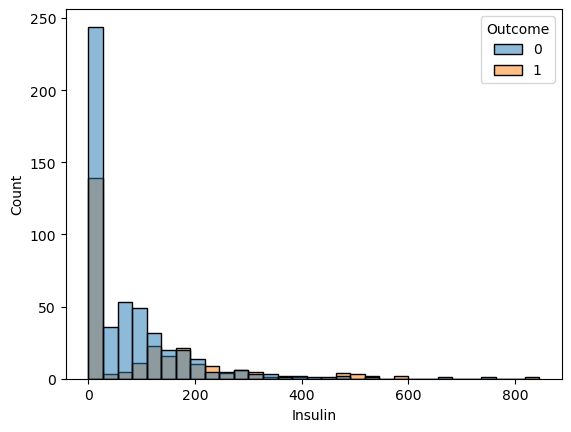

In [20]:
## Analyzing Insulin with target
sns.histplot(x="Insulin",hue="Outcome",data=data)

## data preprocessing feature Engineering

In [21]:
#Step 1 Handling the missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
## Step 2 Handling the corrupted data.
## In 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' certain datapoints are zero.
data.Glucose.replace(0,np.median(data.Glucose),inplace=True)
data.loc[data["Glucose"]==0]
#dataframe.colum.replace('Value to be replaced','By what value')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [23]:
data.loc[data["BMI"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [24]:
data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)
data.SkinThickness.replace(0,np.median(data.SkinThickness),inplace=True)
data.Insulin.replace(0,np.median(data.Insulin),inplace=True)
data.BMI.replace(0,np.median(data.BMI),inplace=True)

In [25]:
## Step 3:-Numerical representation of string data

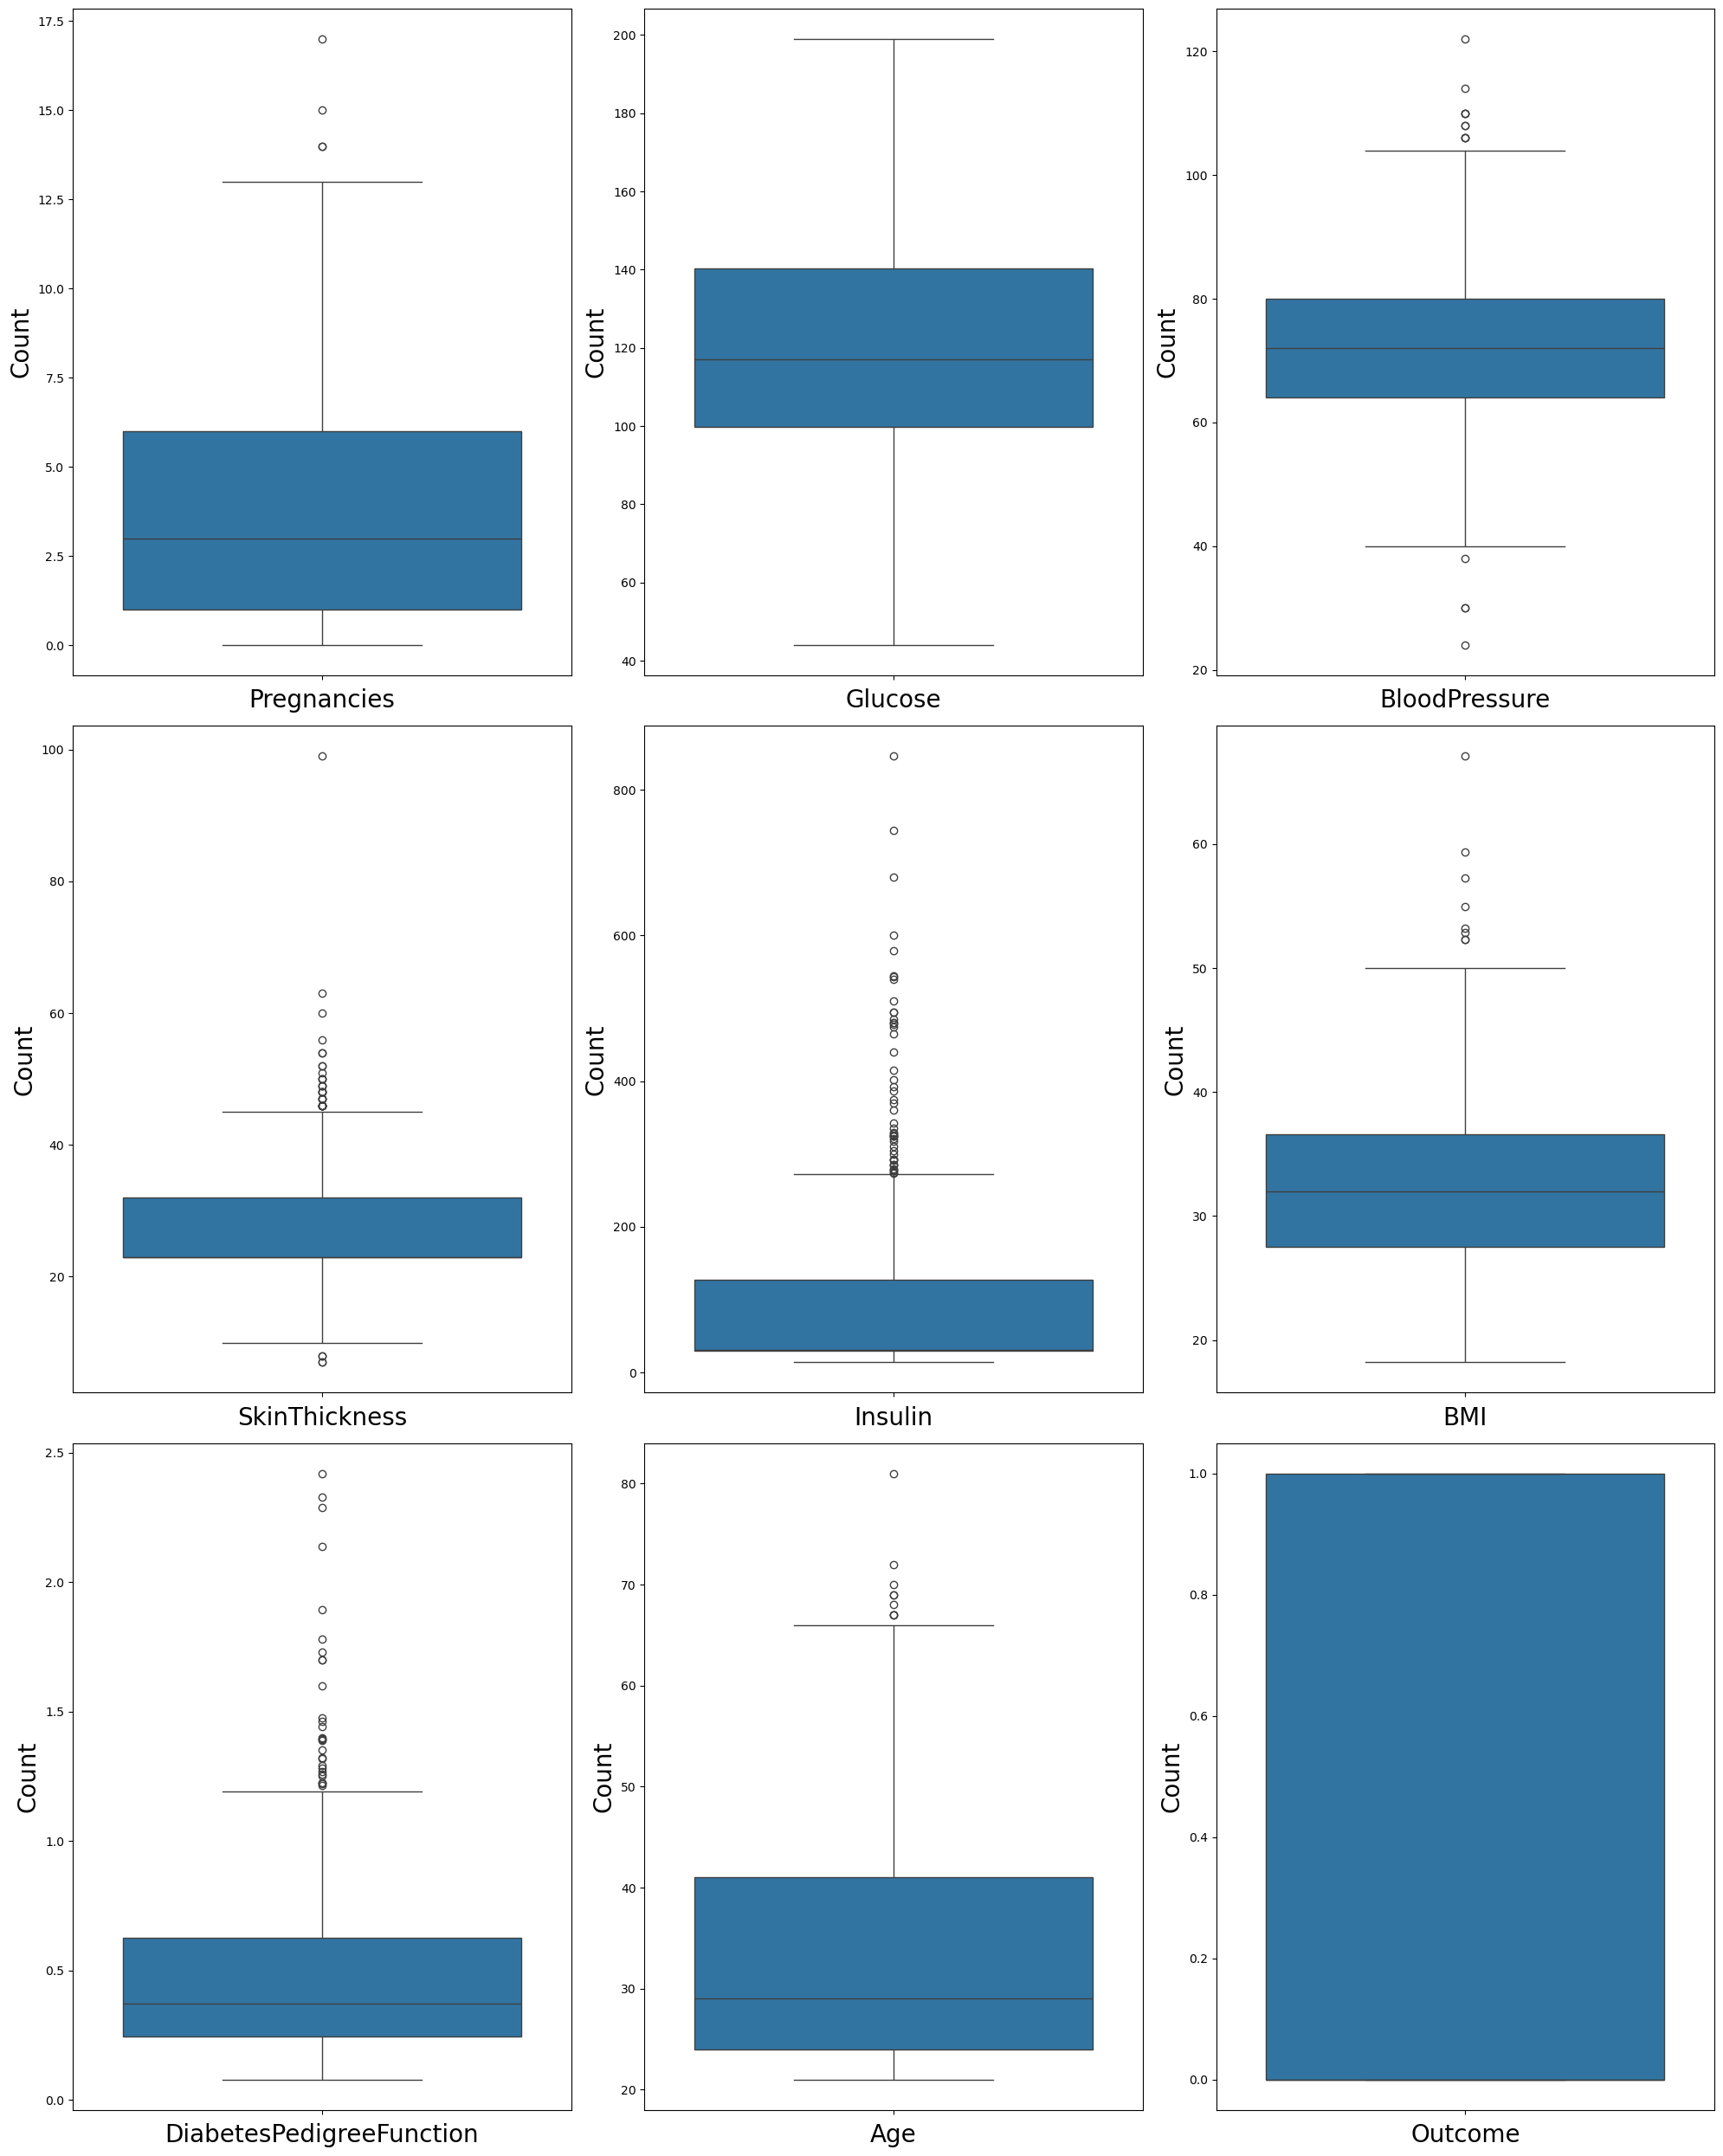

In [26]:
## Step 4:-Checking the outliers
plt.figure(figsize=(20,25),facecolor="White")
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [27]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [28]:
# Step 5:-Scaling the data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
d1=["Pregnancies","Outcome"]
data1=sc.fit_transform(data.drop(d1,axis=1))  ##fit method used to calculation of object

In [29]:
#what is differenec between fit,transform,and fit_transform ...imp fit use to traning ...transform testing data

In [30]:
data1

array([[0.67096774, 0.48979592, 0.30434783, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.26451613, 0.42857143, 0.23913043, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.89677419, 0.40816327, 0.17391304, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.49677419, 0.48979592, 0.17391304, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.52903226, 0.36734694, 0.17391304, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.31612903, 0.46938776, 0.26086957, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [31]:
con_data=data[["Pregnancies","Outcome"]]

In [32]:
con_data

,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [33]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [34]:
# from sklearn.preprocessing import MinMaxScaler
# sc=MinMaxScaler()
# # dl=['Pregnancies','Outcome']
# data1=sc.fit_transform(data2) #.drop(dl,axis=1))


In [35]:
type(data1)

numpy.ndarray

In [36]:
nD=pd.DataFrame(data1,columns=["Glucose","Bloodpressure","SkinThickness","Insulin",
                               'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [37]:
nD


,Glucose,Bloodpressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333


In [38]:
final_df=pd.concat([nD,con_data],axis=1)

In [39]:
final_df

,Glucose,Bloodpressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6,1
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1,0
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,10,0
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,2,0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,5,0
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333,1,1


## feature selection

In [40]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


<Axes: >

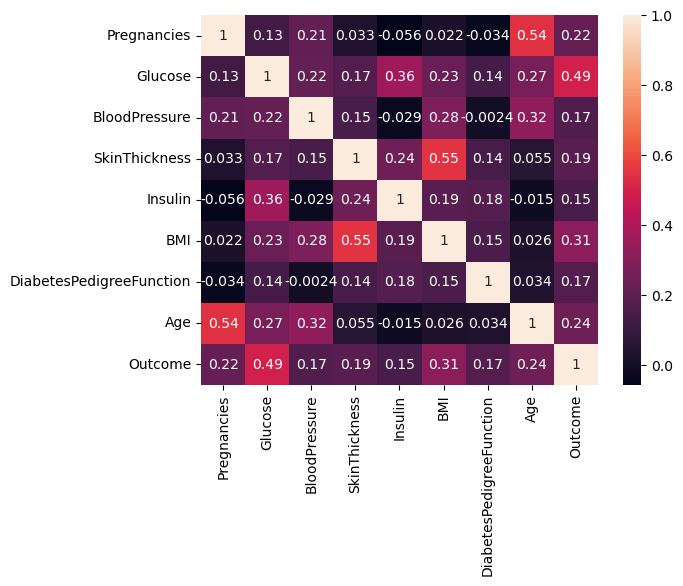

In [41]:
## No redundant fetaures
## We will check correlation
sns.heatmap(data.corr(),annot=True)

# So no correlation hence no features should be 

## Model creation

In [42]:
## input output seperate for model creation

In [43]:
x=data.iloc[:,:-1]
x=x.iloc[:,1:]

In [44]:
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,30.5,33.6,0.627,50
1,85,66,29,30.5,26.6,0.351,31
2,183,64,23,30.5,23.3,0.672,32
3,89,66,23,94.0,28.1,0.167,21
4,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180.0,32.9,0.171,63
764,122,70,27,30.5,36.8,0.340,27
765,121,72,23,112.0,26.2,0.245,30
766,126,60,23,30.5,30.1,0.349,47


In [45]:
y=data.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [46]:
## Step 1 Creating independent and dependent variable.

# X=final_df.iloc[:,:-1]
# y=final_df.Outcome

In [47]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [48]:
## Step 2 Creating training and testing data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45)

In [49]:
y_test

195    1
51     0
66     1
437    0
665    0
      ..
671    0
422    0
742    0
331    0
699    0
Name: Outcome, Length: 192, dtype: int64

In [50]:
## Step 3 Model creation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)  ## traning

LogisticRegression()

In [51]:
## Step 4 Prediction
y_pred=clf.predict(x_test)

In [52]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [53]:
y_pred_prob=clf.predict_proba(x_test)

In [54]:
y_pred_prob

array([[0.32263303, 0.67736697],
       [0.91474794, 0.08525206],
       [0.67026412, 0.32973588],
       [0.52742489, 0.47257511],
       [0.85458435, 0.14541565],
       [0.89099467, 0.10900533],
       [0.46986518, 0.53013482],
       [0.96521771, 0.03478229],
       [0.23934954, 0.76065046],
       [0.93724564, 0.06275436],
       [0.11796624, 0.88203376],
       [0.43962776, 0.56037224],
       [0.94270826, 0.05729174],
       [0.40874431, 0.59125569],
       [0.72626817, 0.27373183],
       [0.93420903, 0.06579097],
       [0.01639688, 0.98360312],
       [0.52187756, 0.47812244],
       [0.2945241 , 0.7054759 ],
       [0.97330423, 0.02669577],
       [0.45638295, 0.54361705],
       [0.66347338, 0.33652662],
       [0.46562069, 0.53437931],
       [0.81786569, 0.18213431],
       [0.79369722, 0.20630278],
       [0.30859621, 0.69140379],
       [0.88857211, 0.11142789],
       [0.21000987, 0.78999013],
       [0.05472513, 0.94527487],
       [0.90063975, 0.09936025],
       [0.

In [55]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [57]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[109  21]
 [ 28  34]]


In [58]:
recall=recall_score(y_test,y_pred)
recall

0.5483870967741935

In [59]:
precision=precision_score(y_test,y_pred)
precision

0.6181818181818182

In [60]:
f1score=f1_score(y_test,y_pred)
f1score

0.5811965811965812

In [61]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       130
           1       0.62      0.55      0.58        62

    accuracy                           0.74       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.74      0.74      0.74       192



In [62]:
y_test.value_counts()

Outcome
0    130
1     62
Name: count, dtype: int64

## Multiclass calssification

Problem statement:-Based on features like sepal,petal length and widht,predict the species of iris flowe

In [63]:
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')

In [64]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [65]:
## Model creation
x=df.iloc[:,:-1]
y=df.Name

In [66]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object

In [67]:
## Training and testing data
x_train1,x_test1,y_train,y_test=train_test_split(x,y,random_state=25)

In [68]:
x_train1

,SepalLength,SepalWidth,PetalLength,PetalWidth
23,5.1,3.3,1.7,0.5
35,5.0,3.2,1.2,0.2
16,5.4,3.9,1.3,0.4
0,5.1,3.5,1.4,0.2
8,4.4,2.9,1.4,0.2
...,...,...,...,...
118,7.7,2.6,6.9,2.3
61,5.9,3.0,4.2,1.5
143,6.8,3.2,5.9,2.3
62,6.0,2.2,4.0,1.0


In [69]:
lr_multi=LogisticRegression()
lr_multi.fit(x_train1,y_train)
y_pred=lr_multi.predict(x_test1)

In [70]:
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [71]:
y_test

28         Iris-setosa
72     Iris-versicolor
70     Iris-versicolor
85     Iris-versicolor
128     Iris-virginica
65     Iris-versicolor
127     Iris-virginica
42         Iris-setosa
81     Iris-versicolor
93     Iris-versicolor
21         Iris-setosa
31         Iris-setosa
26         Iris-setosa
133     Iris-virginica
6          Iris-setosa
58     Iris-versicolor
125     Iris-virginica
139     Iris-virginica
64     Iris-versicolor
94     Iris-versicolor
79     Iris-versicolor
99     Iris-versicolor
66     Iris-versicolor
20         Iris-setosa
34         Iris-setosa
117     Iris-virginica
69     Iris-versicolor
122     Iris-virginica
120     Iris-virginica
41         Iris-setosa
54     Iris-versicolor
113     Iris-virginica
135     Iris-virginica
4          Iris-setosa
115     Iris-virginica
52     Iris-versicolor
68     Iris-versicolor
40         Iris-setosa
Name: Name, dtype: object

In [72]:
recall=recall_score(y_test,y_pred,average="weighted")
recall

0.9736842105263158

In [73]:
precision=precision_score(y_test,y_pred,average="weighted")

In [74]:
f1score=f1_score(y_test,y_pred,average='weighted')
f1score

0.973831844688861

In [75]:
cr=classification_report(y_test,y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

